In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')


<h1 style='color:blue' align='center'>Principal Component Analysis</h1>

## PCA or principal component analysis is a <b style='color:blue'> dimensionality reduction </b>technique that can help us <b style='color:blue'>reduce dimensions </b>of dataset that we use in machine learning for training. It helps with famous dimensionality curse problem. 

<img src='./data/PCA.jpg' width=1000 height=600>

<img src='./data/PCA_1.jpg' width=1000 height=600>

<img src='./data/PCA_2.jpg' width=800 height=600>

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dataset.data.shape

(1797, 64)

In [4]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 720x480 with 0 Axes>

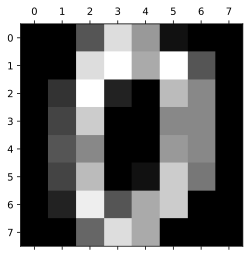

In [6]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [7]:
dataset.target[:5]

array([0, 1, 2, 3, 4])

In [8]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()
df.shape

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,9.00,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00


(1797, 64)

In [9]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,"1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00",...,"1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00","1,797.00"
mean,0.00,0.30,5.20,11.84,11.85,5.78,1.36,0.13,0.01,1.99,...,3.73,0.21,0.00,0.28,5.56,12.09,11.81,6.76,2.07,0.36
std,0.00,0.91,4.75,4.25,4.29,5.67,3.33,1.04,0.09,3.20,...,4.92,0.98,0.02,0.93,5.10,4.37,4.93,5.90,4.09,1.86
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,10.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,11.00,10.00,0.00,0.00,0.00
50%,0.00,0.00,4.00,13.00,13.00,4.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,4.00,13.00,14.00,6.00,0.00,0.00
75%,0.00,0.00,9.00,15.00,15.00,11.00,0.00,0.00,0.00,3.00,...,7.00,0.00,0.00,0.00,10.00,16.00,16.00,12.00,2.00,0.00
max,0.00,8.00,16.00,16.00,16.00,16.00,16.00,15.00,2.00,16.00,...,16.00,13.00,1.00,9.00,16.00,16.00,16.00,16.00,16.00,16.00


In [11]:
X = df
y = dataset.target

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9722222222222222

<h3>Use PCA to reduce dimensions</h3>

In [15]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,9.00,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.00,0.00,4.00,10.00,13.00,6.00,0.00,0.00,0.00,1.00,...,4.00,0.00,0.00,0.00,2.00,14.00,15.00,9.00,0.00,0.00
1793,0.00,0.00,6.00,16.00,13.00,11.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,6.00,16.00,14.00,6.00,0.00,0.00
1794,0.00,0.00,1.00,11.00,15.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,9.00,13.00,6.00,0.00,0.00
1795,0.00,0.00,2.00,10.00,7.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.00,0.00,0.00,5.00,12.00,16.00,12.00,0.00,0.00


<img src='./data/PCA_3.JPG' width=600 height=800>

<a href='https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained#:~:text=In%20case%20of%20PCA%2C%20%22variance,3.448)%20is%20the%20overall%20variability.'>Source</a>

**Use components such that 95% of variance is retained**

In [16]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [17]:
pca.explained_variance_ratio_

len(pca.explained_variance_ratio_)

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

29

In [18]:
pca.n_components_

29

**PCA created 29 components out of 64 original columns**

In [19]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [20]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9694444444444444

**Let's now select only two components**

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [23]:
X_pca

array([[ -1.25946966,  21.27488504],
       [  7.95760963, -20.76869753],
       [  6.99192635,  -9.9559883 ],
       ...,
       [ 10.80128378,  -6.96025398],
       [ -4.87210374,  12.42395872],
       [ -0.34438704,   6.36554626]])

In [24]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

<p style='color:blue'><b>You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information</b></p>

In [25]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life there are many cases where using 2 or few PCA components can still give you a pretty good accuracy

### Exercise

In [27]:
df = pd.read_csv("./data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [28]:
df.shape

(918, 12)

In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


### Handling Outliers

In [30]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.00,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.00,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.60,Flat,0


In [32]:
df.shape

(918, 12)

In [31]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [33]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [34]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [35]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.00,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.20,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.60,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.20,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.20,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.40,Down,1


In [36]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [37]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.00,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.00,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.00,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.00,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.00,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.00,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.00,Up,1


In [38]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [39]:
df.ChestPainType.unique()
df.RestingECG.unique()
df.ExerciseAngina.unique()
df.ST_Slope.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

array(['Normal', 'ST', 'LVH'], dtype=object)

array(['N', 'Y'], dtype=object)

array(['Up', 'Flat', 'Down'], dtype=object)

In [40]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.00,3,0
1,49,F,NAP,160,180,0,1,156,0,1.00,2,1
2,37,M,ATA,130,283,0,2,98,0,0.00,3,0
3,48,F,ASY,138,214,0,1,108,1,1.50,2,1
4,54,M,NAP,150,195,0,1,122,0,0.00,3,0


In [41]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.00,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.00,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.00,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.50,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.00,3,0,1,0,1,0


In [42]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.00,3,1,1,0,0
1,49,160,180,0,1,156,0,1.00,2,0,0,1,0
2,37,130,283,0,2,98,0,0.00,3,1,1,0,0
3,48,138,214,0,1,108,1,1.50,2,0,0,0,0
4,54,150,195,0,1,122,0,0.00,3,1,0,1,0


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [43]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [45]:
X_train.shape
X_test.shape

(721, 13)

(181, 13)

**Use RandomForestClassifier**

In [46]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.861878453038674

**Use PCA to reduce dimensions**

In [47]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.00,3,1,1,0,0
1,49,160,180,0,1,156,0,1.00,2,0,0,1,0
2,37,130,283,0,2,98,0,0.00,3,1,1,0,0
3,48,138,214,0,1,108,1,1.50,2,0,0,0,0
4,54,150,195,0,1,122,0,0.00,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.20,2,1,0,0,1
914,68,144,193,1,1,141,0,3.40,2,1,0,0,0
915,57,130,131,0,1,115,1,1.20,2,1,0,0,0
916,57,130,236,0,3,174,0,0.00,2,0,1,0,0


In [49]:
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca
X_pca.shape

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

(902, 2)

In [50]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [51]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.7348066298342542